# Example 8: RVT SRA with simulated profiles

Use RVT with simulated profiles to compute the surface response spectrum and surface spectral ratio.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import pystrata

%matplotlib inline

In [ ]:
# Increased figure sizes
plt.rcParams["figure.dpi"] = 120

## Create a point source theory RVT motion

In [ ]:
m = pystrata.motion.SourceTheoryRvtMotion(6.0, 30, "wna")
m.calc_fourier_amps()

## Create site profile

This is about the simplest profile that we can create. Linear-elastic soil and rock.

In [ ]:
profile = pystrata.site.Profile(
    [
        pystrata.site.Layer(
            pystrata.site.DarendeliSoilType(18.0, plas_index=0, ocr=1, stress_mean=100),
            10,
            400,
        ),
        pystrata.site.Layer(
            pystrata.site.DarendeliSoilType(18.0, plas_index=0, ocr=1, stress_mean=200),
            10,
            450,
        ),
        pystrata.site.Layer(
            pystrata.site.DarendeliSoilType(18.0, plas_index=0, ocr=1, stress_mean=400),
            30,
            600,
        ),
        pystrata.site.Layer(pystrata.site.SoilType("Rock", 24.0, None, 0.01), 0, 1200),
    ]
)

## Create the site response calculator

In [ ]:
calc = pystrata.propagation.EquivalentLinearCalculator()

## Initialize the variations

In [ ]:
var_thickness = pystrata.variation.ToroThicknessVariation()
var_velocity = pystrata.variation.ToroVelocityVariation.generic_model("USGS C")
var_soiltypes = pystrata.variation.SpidVariation(
    -0.5, std_mod_reduc=0.15, std_damping=0.30
)

## Specify the output

In [ ]:
freqs = np.logspace(-1, 2, num=500)

outputs = pystrata.output.OutputCollection(
    [
        pystrata.output.ResponseSpectrumOutput(
            # Frequency
            freqs,
            # Location of the output
            pystrata.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ),
        pystrata.output.ResponseSpectrumRatioOutput(
            # Frequency
            freqs,
            # Location in (denominator),
            pystrata.output.OutputLocation("outcrop", index=-1),
            # Location out (numerator)
            pystrata.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ),
        pystrata.output.InitialVelProfile(),
    ]
)

## Perform the calculation

In [ ]:
count = 20
for p in pystrata.variation.iter_varied_profiles(
    profile,
    count,
    var_thickness=var_thickness,
    var_velocity=var_velocity,
    var_soiltypes=var_soiltypes,
):
    # Here we auto-descretize the profile for wave propagation purposes
    p = p.auto_discretize()
    calc(m, p, p.location("outcrop", index=-1))
    outputs(calc)

## Plot the outputs

Create a few plots of the output.

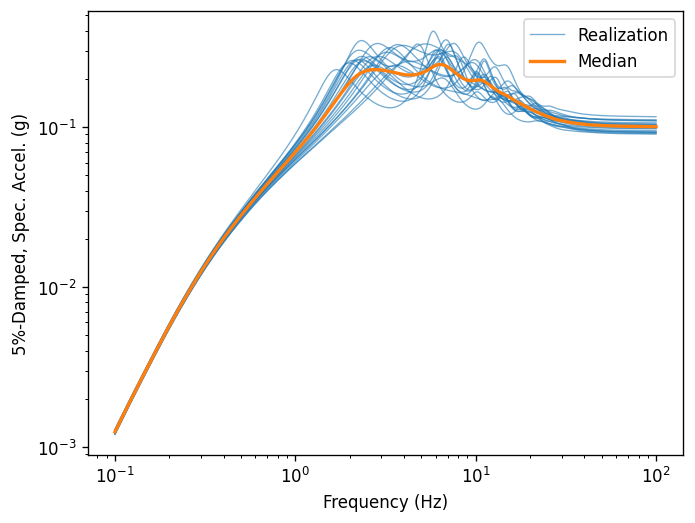

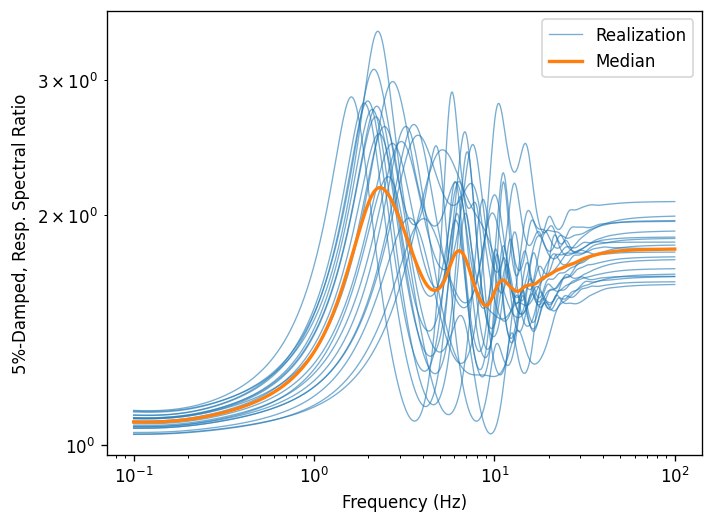

In [ ]:
for o in outputs[:-1]:
    ax = o.plot(style="stats")

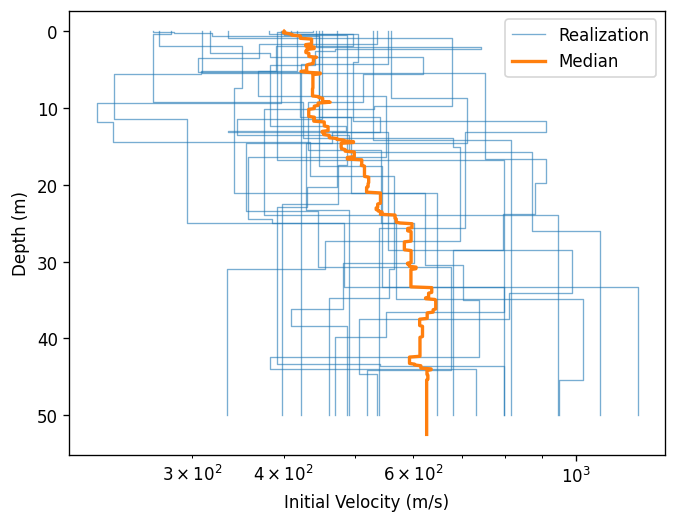

In [ ]:
ax = outputs[-1].plot(style="stats")

The statistics of the output can be also retrieved and returned as either a `dict` or `pandas.DataFrame`.

In [ ]:
outputs[-1].calc_stats()

{'ref': array([ 0.        ,  0.10273973,  0.20547945,  0.30821918,  0.4109589 ,
         0.51369863,  0.61643836,  0.71917808,  0.82191781,  0.92465753,
         1.02739726,  1.13013699,  1.23287671,  1.33561644,  1.43835616,
         1.54109589,  1.64383562,  1.74657534,  1.84931507,  1.95205479,
         2.05479452,  2.15753425,  2.26027397,  2.3630137 ,  2.46575342,
         2.56849315,  2.67123288,  2.7739726 ,  2.87671233,  2.97945205,
         3.08219178,  3.18493151,  3.28767123,  3.39041096,  3.49315068,
         3.59589041,  3.69863014,  3.80136986,  3.90410959,  4.00684932,
         4.10958904,  4.21232877,  4.31506849,  4.41780822,  4.52054795,
         4.62328767,  4.7260274 ,  4.82876712,  4.93150685,  5.03424658,
         5.1369863 ,  5.23972603,  5.34246575,  5.44520548,  5.54794521,
         5.65068493,  5.75342466,  5.85616438,  5.95890411,  6.06164384,
         6.16438356,  6.26712329,  6.36986301,  6.47260274,  6.57534247,
         6.67808219,  6.78082192,  6.8835616

In [ ]:
outputs[-1].calc_stats(as_dataframe=True)

,median,ln_std
depth,,
0.000000,400.593879,0.230164
0.102740,399.698901,0.223713
0.205479,399.698901,0.223713
0.308219,405.988086,0.221006
0.410959,410.480796,0.230631
...,...,...
52.089041,626.426541,0.348274
52.191781,626.426541,0.348274
52.294521,626.426541,0.348274


## Repeat using a Generic Depth-Dependent Model

The generic `DepthDependToroVelVariation` follows the SPID guidance.

In [ ]:
var_velocity_dd = pystrata.variation.DepthDependToroVelVariation.generic_model("USGS C")

In [ ]:
outputs.reset()
count = 20
for p in pystrata.variation.iter_varied_profiles(
    profile,
    count,
    var_thickness=var_thickness,
    var_velocity=var_velocity_dd,
    var_soiltypes=var_soiltypes,
):
    p = p.auto_discretize()
    calc(m, p, p.location("outcrop", index=-1))
    outputs(calc)

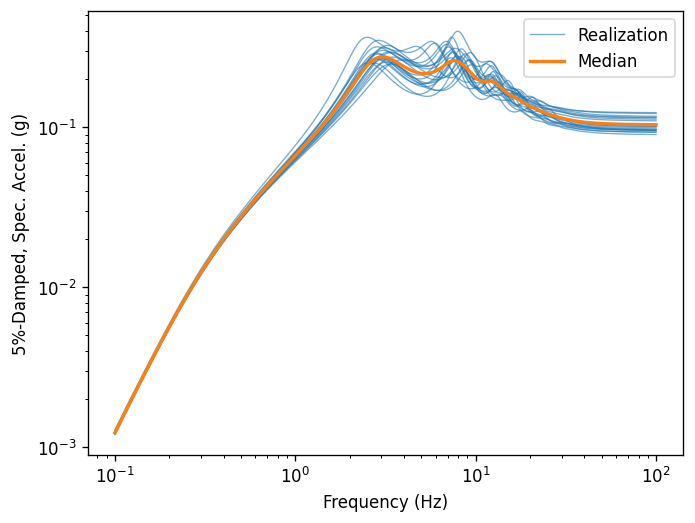

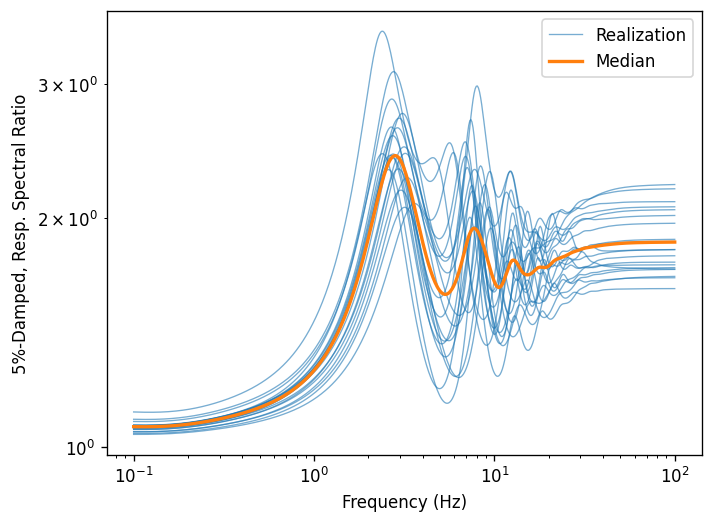

In [ ]:
for o in outputs[:-1]:
    ax = o.plot(style="stats")

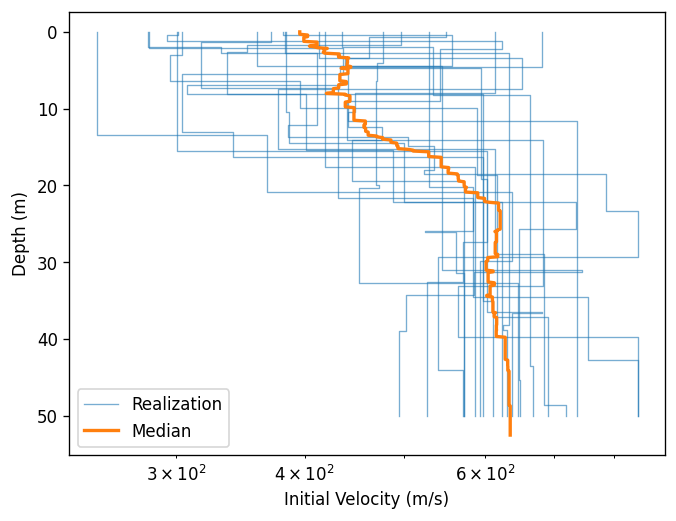

In [ ]:
ax = outputs[-1].plot(style="stats")

In [ ]:
outputs[-1].calc_stats(as_dataframe=True)

,median,ln_std
depth,,
0.000000,395.740995,0.269479
0.102740,395.740995,0.269479
0.205479,395.740995,0.269479
0.308219,395.740995,0.269479
0.410959,402.808474,0.280597
...,...,...
52.089041,634.270179,0.133731
52.191781,634.270179,0.133731
52.294521,634.270179,0.133731


## Repeat using a Specific Depth-Dependent Model

In [ ]:
var_velocity_dd = pystrata.variation.DepthDependToroVelVariation.generic_model(
    "USGS C", depth=[0, 10, 20], ln_std=[0.25, 0.15, 0.10]
)

In [ ]:
outputs.reset()
count = 20
for p in pystrata.variation.iter_varied_profiles(
    profile,
    count,
    var_thickness=var_thickness,
    var_velocity=var_velocity_dd,
    var_soiltypes=var_soiltypes,
):
    p = p.auto_discretize()
    calc(m, p, p.location("outcrop", index=-1))
    outputs(calc)

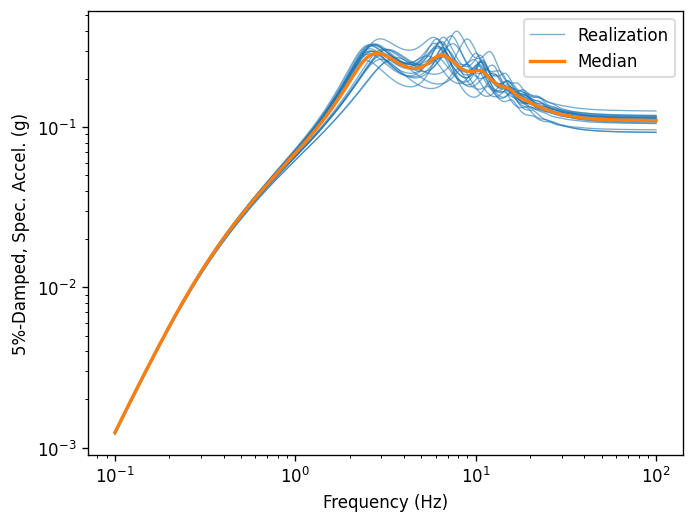

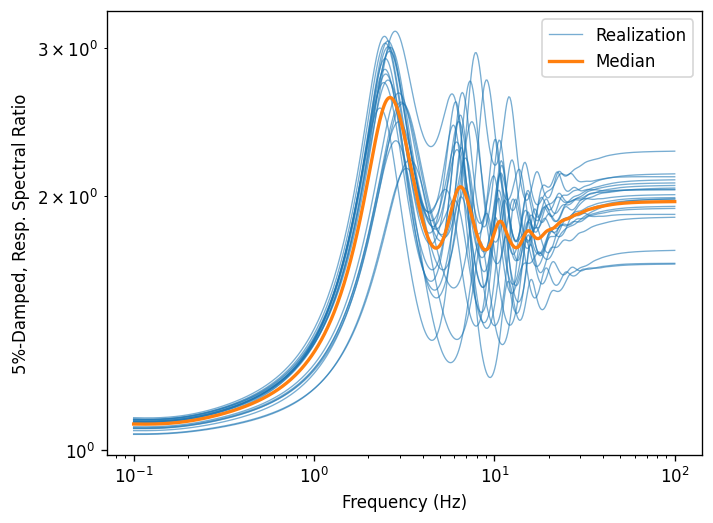

In [ ]:
for o in outputs[:-1]:
    ax = o.plot(style="stats")

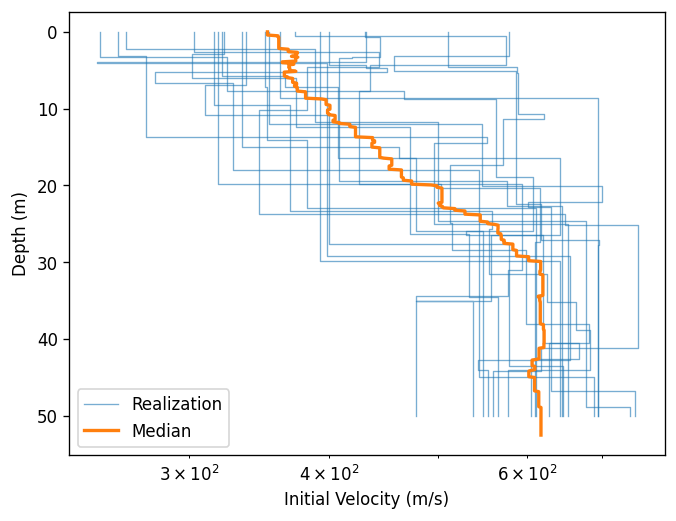

In [ ]:
ax = outputs[-1].plot(style="stats")

In [ ]:
outputs[-1].calc_stats(as_dataframe=True)

,median,ln_std
depth,,
0.000000,352.187253,0.207454
0.102740,352.187253,0.207454
0.205479,352.187253,0.207454
0.308219,352.187253,0.207454
0.410959,352.187253,0.207454
...,...,...
52.089041,617.603706,0.112436
52.191781,617.603706,0.112436
52.294521,617.603706,0.112436
